In [96]:
import numpy as np
import nltk
import spacy

from matplotlib import pyplot as plt
from numpy.linalg import norm

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sergei\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Misc

**Tokenizing**

In [3]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [4]:
text = 'To see a World in a Grain of Sand \
And a Heaven in a Wild Flower, \
Hold Infinity in the palm of your hand \
And Eternity in an hour.'

In [5]:
print(word_tokenize(text))

['To', 'see', 'a', 'World', 'in', 'a', 'Grain', 'of', 'Sand', 'And', 'a', 'Heaven', 'in', 'a', 'Wild', 'Flower', ',', 'Hold', 'Infinity', 'in', 'the', 'palm', 'of', 'your', 'hand', 'And', 'Eternity', 'in', 'an', 'hour', '.']


**Stopwords**

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sergei\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

In [8]:
sw = stopwords.words('english')
words = [x for x in word_tokenize(text) if x not in sw]

In [9]:
words

['To',
 'see',
 'World',
 'Grain',
 'Sand',
 'And',
 'Heaven',
 'Wild',
 'Flower',
 ',',
 'Hold',
 'Infinity',
 'palm',
 'hand',
 'And',
 'Eternity',
 'hour',
 '.']

**Stemming**

In [10]:
from nltk import PorterStemmer
ps = PorterStemmer()

In [11]:
print(list(map(ps.stem, words)))

['To', 'see', 'world', 'grain', 'sand', 'and', 'heaven', 'wild', 'flower', ',', 'hold', 'infin', 'palm', 'hand', 'and', 'etern', 'hour', '.']


**POS tree**

In [12]:
from nltk.corpus import treebank
nltk.download('treebank')

[nltk_data] Downloading package treebank to
[nltk_data]     C:\Users\Sergei\AppData\Roaming\nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

In [13]:
help(treebank)

Help on LazyCorpusLoader in module nltk.corpus.util object:

treebank/combined = class LazyCorpusLoader(builtins.object)
 |  treebank/combined(name, reader_cls, *args, **kwargs)
 |  
 |  To see the API documentation for this lazily loaded corpus, first
 |  run corpus.ensure_loaded(), and then run help(this_corpus).
 |  
 |  LazyCorpusLoader is a proxy object which is used to stand in for a
 |  corpus object before the corpus is loaded.  This allows NLTK to
 |  create an object for each corpus, but defer the costs associated
 |  with loading those corpora until the first time that they're
 |  actually accessed.
 |  
 |  The first time this object is accessed in any way, it will load
 |  the corresponding corpus, and transform itself into that corpus
 |  (by modifying its own ``__class__`` and ``__dict__`` attributes).
 |  
 |  If the corpus can not be found, then accessing this object will
 |  raise an exception, displaying installation instructions for the
 |  NLTK data package.  Once 

In [14]:
#pic = treebank.parsed_sents('wsj_0001.mrg')[0]
#pic.draw()

**NER**

In [28]:
#python -m spacy download en_core_web_sm

import spacy
nlp = spacy.load("en_core_web_sm")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a shortcut link, a Python package or a valid path to a data directory.

In [25]:
help(spacy)

Help on package spacy:

NAME
    spacy - # coding: utf8

PACKAGE CONTENTS
    __main__
    _align
    _ml
    about
    analysis
    attrs
    cli (package)
    compat
    data (package)
    displacy (package)
    errors
    glossary
    gold
    kb
    lang (package)
    language
    lemmatizer
    lexeme
    lookups
    matcher (package)
    ml (package)
    morphology
    parts_of_speech
    pipeline (package)
    scorer
    strings
    symbols
    syntax (package)
    tests (package)
    tokenizer
    tokens (package)
    util
    vectors
    vocab

FUNCTIONS
    blank(name, **kwargs)
    
    info(model=None, markdown=False, silent=False)
    
    load(name, **overrides)

DATA
    Errors = <spacy.errors.add_codes.<locals>.ErrorsWithCodes object>
    Warnings = <spacy.errors.add_codes.<locals>.ErrorsWithCodes object>
    unicode_literals = _Feature((2, 6, 0, 'alpha', 2), (3, 0, 0, 'alpha', ...

VERSION
    2.2.4

FILE
    d:\python37\lib\site-packages\spacy\__init__.py




In [ ]:
parsed = nlp(text)

# Classification

In [29]:
from sklearn.datasets import fetch_20newsgroups
n_train = fetch_20newsgroups(subset='train')

In [30]:
n_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [36]:
n_train.data[4]

'From: jcm@head-cfa.harvard.edu (Jonathan McDowell)\nSubject: Re: Shuttle Launch Question\nOrganization: Smithsonian Astrophysical Observatory, Cambridge, MA,  USA\nDistribution: sci\nLines: 23\n\nFrom article <C5owCB.n3p@world.std.com>, by tombaker@world.std.com (Tom A Baker):\n>>In article <C5JLwx.4H9.1@cs.cmu.edu>, ETRAT@ttacs1.ttu.edu (Pack Rat) writes...\n>>>"Clear caution & warning memory.  Verify no unexpected\n>>>errors. ...".  I am wondering what an "expected error" might\n>>>be.  Sorry if this is a really dumb question, but\n> \n> Parity errors in memory or previously known conditions that were waivered.\n>    "Yes that is an error, but we already knew about it"\n> I\'d be curious as to what the real meaning of the quote is.\n> \n> tom\n\n\nMy understanding is that the \'expected errors\' are basically\nknown bugs in the warning system software - things are checked\nthat don\'t have the right values in yet because they aren\'t\nset till after launch, and suchlike. Rather than

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
cats = ['rec.sport.hockey', 'sci.crypt','comp.graphics','talk.politics.misc']
n_train = fetch_20newsgroups(subset='train',categories=cats)

print(len(n_train.data))

2244


In [42]:
vectorizer = TfidfVectorizer(lowercase=True)

#sparce matrix
vectors = vectorizer.fit_transform(n_train.data)

In [43]:
vectors.shape

(2244, 36820)

In [46]:
vec = vectors.todense()[1]

In [48]:
vec[vec != 0]

matrix([[0.28587133, 0.04780443, 0.02094763, 0.06912555, 0.08912667,
         0.10379202, 0.02993483, 0.03155774, 0.13058722, 0.06589882,
         0.25785352, 0.12061764, 0.08869737, 0.08325699, 0.07397006,
         0.0586384 , 0.14293567, 0.13300191, 0.02267493, 0.15443625,
         0.27286638, 0.01781504, 0.05779538, 0.14293567, 0.09942515,
         0.02750707, 0.03225783, 0.02925843, 0.0490427 , 0.07592973,
         0.01785476, 0.03782875, 0.12061764, 0.10704009, 0.08389331,
         0.03241922, 0.05715541, 0.02937951, 0.01835481, 0.03720528,
         0.05285844, 0.03140394, 0.06699585, 0.14293567, 0.12456651,
         0.13571229, 0.14794012, 0.28587133, 0.26117444, 0.1110154 ,
         0.07649705, 0.01781504, 0.428807  , 0.14293567, 0.03772177,
         0.08673054, 0.03427821, 0.04832461, 0.07790929, 0.04734058,
         0.08264261, 0.14293567, 0.03343855, 0.09299369, 0.08912667,
         0.09974649, 0.08746826]])

**Add stopwords and lemmatization**

In [60]:
nltk.download('wordnet')
lemmatizator = nltk.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sergei\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [70]:
def clean(text):
   return ' '.join([lemmatizator.lemmatize(x) for x in word_tokenize(text.lower()) if x not in sw])

In [71]:
print(clean(n_train.data[3]))

: young @ is.s.u-tokyo.ac.jp ( young shio hong ) subject : looking dr. bala r. vatti 's email address nntp-posting-host : rabbit-gw organization : dept . information science , univ . tokyo , japan . distribution : comp.graphics x-bytes : 660 line : 27 hi ! looking email address author '' generic solution polygon clipping '' , communication acm , july 1992 , vol . 35 , . 7. got information author follows mr. bala r. vatti lcec , 65 river road , hudson , n.h. 03051 email : vatti @ waynar.lcec.lockheed want get related detailed paper topic author . failed send email address . information appreciated . thank much . best regard . s. h. young kunii lab dept . information science faculty science university tokyo bunkyo-ku , hongo 7-3-1 113 tokyo , japan email : young @ is.s.u-tokyo.ac.jp


In [73]:
vectorizer = TfidfVectorizer(preprocessor=clean)
vectors = vectorizer.fit_transform(n_train.data)

In [74]:
vectors.shape

(2244, 34505)

**Cosine similarity**

In [76]:
d_vectors = vectors.todense()

In [90]:
def cos_similarity(v1,v2):
    v1 = np.asarray(v1).squeeze()
    v2 = np.asarray(v2).squeeze()
    return np.dot(v1,v2)/(norm(v1)*norm(v2))

In [100]:
cos_similarity(d_vectors[0], d_vectors[3])

0.014948363079775973

In [89]:
np.asarray(d_vectors[0]).squeeze()

array([0., 0., 0., ..., 0., 0., 0.])

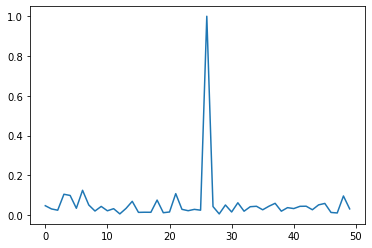

In [112]:
sims = [cos_similarity(d_vectors[26], d_vectors[i]) for i in range(50)]
plt.plot(sims)

**Classification**

In [133]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
import sklearn.metrics.classification as metric 

In [123]:
x_train, x_test, y_train, y_test = train_test_split(d_vectors, n_train.target, test_size=0.2)

In [124]:
print(x_train.shape)
print(y_train.shape)

(1795, 34505)
(1795,)


In [132]:
#loss='hinge' => SVM 
sgd = SGDClassifier()

sgd.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [141]:
print(metric.balanced_accuracy_score(y_test, sgd.predict(x_test)))

0.983561232942536


In [136]:
help(metric)

Help on module sklearn.metrics.classification in sklearn.metrics:

NAME
    sklearn.metrics.classification - Metrics to assess performance on classification task given class prediction

DESCRIPTION
    Functions named as ``*_score`` return a scalar value to maximize: the higher
    the better
    
    Function named as ``*_error`` or ``*_loss`` return a scalar value to minimize:
    the lower the better

FUNCTIONS
    accuracy_score(y_true, y_pred, normalize=True, sample_weight=None)
        Accuracy classification score.
        
        In multilabel classification, this function computes subset accuracy:
        the set of labels predicted for a sample must *exactly* match the
        corresponding set of labels in y_true.
        
        Read more in the :ref:`User Guide <accuracy_score>`.
        
        Parameters
        ----------
        y_true : 1d array-like, or label indicator array / sparse matrix
            Ground truth (correct) labels.
        
        y_pred : 1d ar